In [2]:
import numpy as np
import logging
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import cv2
import os

1.0

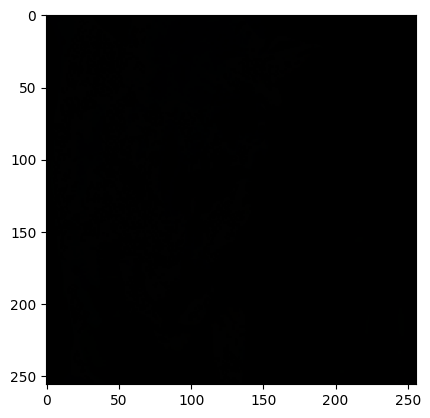

In [3]:
pth = "/home/cmk2000/Documents/Years 2/Python codes and results/Python codes/Codes/Diffusion codes with PnP/cmmd/test/mmse_a/ILSVRC2012_val_00000012.png"

im = mpimg.imread(pth)
image_bgra = cv2.cvtColor(im, cv2.COLOR_RGBA2BGRA)
plt.imshow(image_bgra)

im.max()

In [8]:
pth0 = "/home/cmk2000/Documents/Years 2/Python codes and results/Python codes/Codes/Diffusion codes with PnP/cmmd/test"
pth0.rsplit('/', 1)
#rewrite_images(pth0, "true")

['/home/cmk2000/Documents/Years 2/Python codes and results/Python codes/Codes/Diffusion codes with PnP/cmmd',
 'test']

In [7]:
# Get the dimensions of the image
height, width, _ = im.shape

# Create an alpha channel with full opacity
alpha_channel = 255 * np.ones((height, width, 1), dtype=np.uint8)

# Concatenate the alpha channel to the RGB image to create an RGBA image
image_rgba = np.concatenate((im, alpha_channel), axis=2)

image_rgba.shape

(256, 256, 4)

In [7]:
original_string = "methos_our_x_y"

# Split the string from the right, at the last underscore
parts = original_string.rsplit('_', 1)

# parts will be a list with two elements: ['methos_our_x', 'y']
part1 = parts[0]
part2 = parts[1]

print(part1)  # Output: methos_our_x
print(part2)  # Output: y

methos_our_x
y


In [5]:
def save_images(dir, image, name):
    image_array = cv2.cvtColor(image, cv2.COLOR_RGBA2BGRA)
    cv2.imwrite(os.path.join(dir,name+'.png'), image_array)
 
def rewrite_images(dir, folder):
    dir0, folder = dir.rsplit('/', 1)
    data = os.listdir(dir)

    for i in range(len(data)):
        data[i] = dir +'/' + data[i]
    
    for i_im in range(len(data)): 
        filename = data[i_im]
        dataname = filename.split("/")[-1]
        dataname = dataname.split(".")[0]

        im = mpimg.imread(filename) 
        im_channel = im.shape[-1]
        
        if im.shape[2] == 3:
            image_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        else:
            # If the image already has an alpha channel (4 channels), convert directly to RGBA
            image_rgb = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)

        # Convert RGB to RGBA (add an alpha channel if not present)
        if image_rgb.shape[2] == 3:
            alpha_channel = 255 * np.ones((image_rgb.shape[0], image_rgb.shape[1], 1), dtype=image_rgb.dtype)
            image_rgba = np.concatenate((image_rgb, alpha_channel), axis=2)
        else:
            image_rgba = image_rgb

        # Convert RGBA to BGRA
        image_bgra = cv2.cvtColor(image_rgba, cv2.COLOR_RGBA2BGRA)

        dir_save = os.path.join(dir0, folder+"_a")
        os.makedirs(dir_save, exist_ok=True)
        save_images(dir_save, image_bgra, dataname)

In [12]:
# Create logger
dataset = "imaeg"
rate = 0.3
script_dir = "./"
logger_name = f'{dataset}_{rate}.log'
log_dir = os.path.join(script_dir)



# Configure the rotating file handler
log_file = os.path.join(log_dir, logger_name)
if os.path.isdir(log_file):
    raise IsADirectoryError(f"The specified log file path is a directory: {log_file}")

  # Configure the logging
logging.basicConfig(
    filename=log_file,                # Full path to the log file
    filemode='a',                      # Append mode
    level=logging.DEBUG,               # Set the logging level
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',  # Log format
    datefmt='%Y-%m-%d %H:%M:%S'        # Date format
)

# Create logger
logger = logging.getLogger(logger_name)


In [13]:
!ls

ACF					       Free_bias_PnP_ULA_remi
Autocorrelations			       imaeg_0.3.log
Basic diffusion models			       images
BLIND					       Main codes 
Blind-diffusion				       MATLAB
CNN kernel estimation			       NON_BLIND
Convolutional network for timestep prediction  patch based priors
coverage				       pretrained_models
coverage_ila_py_Teresa			       Regularised_PnP_ULA_coupled
coverage_results			       running_tracking.txt
Datasets				       scenic
DDRM					       SEMI_BLIND
Diffusion codes with PnP		       SK-ROCK
Diffusion models			       test.py
FB_model


In [1]:
import numpy
import jax
import cv2

ModuleNotFoundError: No module named 'numpy'

In [4]:
!pip3 install numpy


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached numpy-2.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbr